In [13]:
#Expand notebook to take full screen width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

###
import sys
sys.path.insert(0,'../../src/')

%load_ext autoreload
%autoreload 2

#%pdb

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
import pickle
import pandas as pd
sns.reset_orig()
matplotlib.rcParams.update({'font.size': 12})
from utils_write import loadfile, stack_weights, cr_calc

In [15]:
res = loadfile(250, 10, 2500, 1250, 1e-6, 5, 16, "LeNet_300_100", model_save_dir = "./files")

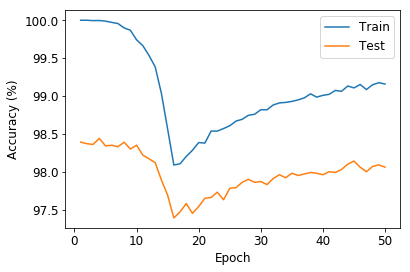

In [16]:
train = plt.plot(res['epochs'], res['train_acc'], label = "Train")
test = plt.plot(res['epochs'], res['test_acc'], label = "Test")
plt.legend(ncol=1, fontsize=12)
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.show()

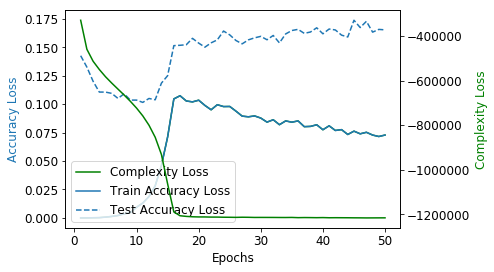

In [17]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(res['epochs'], res['train_loss'][:-1], label = "Complexity Loss", color = 'g')
p = ax1.plot(res['epochs'], res['train_loss'][:-1], label = "Train Accuracy Loss")
color = p[0].get_color()
ax1.plot(res['epochs'], res['test_loss'], label = "Test Accuracy Loss", linestyle = "--", color = color)
ax1.legend(loc=3)
ax2.plot(res['epochs'], res['complexity_loss'], label = "Complexity", color = 'g')

ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy Loss', color=color)
ax2.set_ylabel('Complexity Loss', color='g')
plt.show()

In [18]:
print ('Prune Acc:{:.2f} Sparsity:{:.2f}'.format(res['prune_acc']['test'], res['sparsity']))

Prune Acc:97.59 Sparsity:97.45


### 3. Means

In [21]:
m_exp = pd.DataFrame(columns = ["mean", "zmean", "acc", "sp"])
idx=0
#start from 10, 1000
mlist = [0.1, 1, 10, 100, 1000]
zmlist = [10, 100, 1000, 5000]
for mean in mlist:
    for zmean in zmlist:
        res = loadfile(mean, 10, zmean, 1250, 1e-6, 5, 16, "LeNet_300_100", model_save_dir = "./files")
        m_exp.loc[idx] = ([mean, zmean, res["prune_acc"]["test"], res["sparsity"]])
        idx+=1

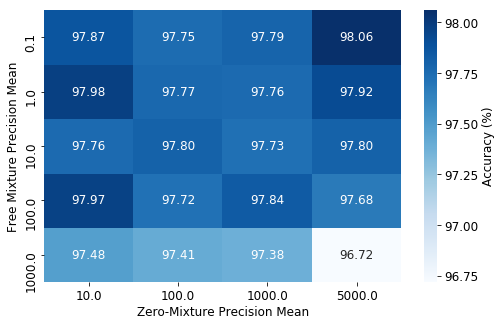

In [22]:
plt.figure(figsize=(8,5))
sns.heatmap(m_exp.pivot(index='mean', columns='zmean', values='acc'), cmap='Blues', cbar_kws = {'label' : 'Accuracy (%)'}, annot=True, fmt=".2f")
plt.xlabel("Zero-Mixture Precision Mean")
plt.ylabel("Free Mixture Precision Mean")
plt.savefig('figs/swskdmeanacc.eps', format='eps', dpi=1000, bbox_inches='tight')
plt.show()

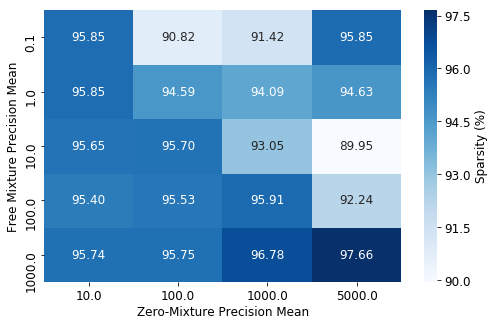

In [23]:
plt.figure(figsize=(8,5))
sns.heatmap(m_exp.pivot(index='mean', columns='zmean', values='sp'), cmap='Blues', cbar_kws = {'label' : 'Sparsity (%)'}, annot=True, fmt=".2f")
plt.xlabel("Zero-Mixture Precision Mean")
plt.ylabel("Free Mixture Precision Mean")
plt.savefig('figs/swskdmeansp.eps', format='eps', dpi=1000, bbox_inches='tight')
plt.show()

### 4. Temp Tau Exp

In [29]:
tt_exp = pd.DataFrame(columns = ["temp", "tau", "acc", "sp"])
idx=0
#start from 10, 1000
temp_list = [1, 2, 4, 5, 6, 8]
tau_list = [5e-6, 2e-6, 1e-6, 5e-7, 2e-7, 1e-7]
for temp in temp_list:
    for tau in tau_list:
        res = loadfile(250, 10, 2500, 1250, tau, temp, 16, "LeNet_300_100", model_save_dir = "./files")
        tt_exp.loc[idx] = ([temp, tau, res["prune_acc"]["test"], res["sparsity"]])
        idx+=1

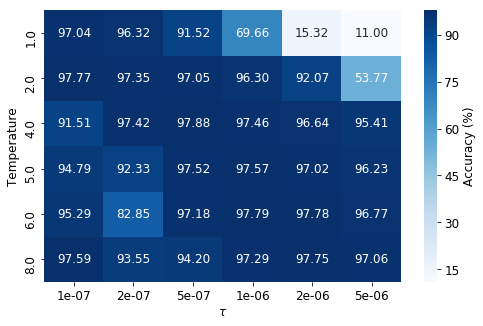

In [30]:
plt.figure(figsize=(8,5))
sns.heatmap(tt_exp.pivot(index='temp', columns='tau', values='acc'), cmap='Blues', cbar_kws = {'label' : 'Accuracy (%)'}, annot=True, fmt=".2f")
plt.xlabel("$\\tau$")
plt.ylabel("Temperature")
plt.savefig('figs/swskdttacc.eps', format='eps', dpi=1000, bbox_inches='tight')
plt.show()

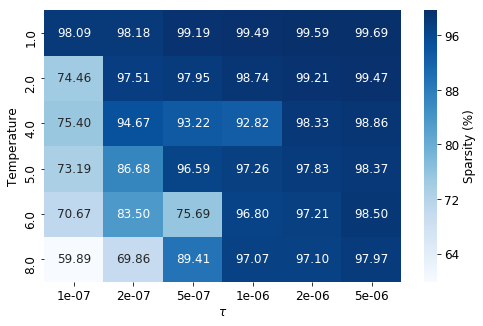

In [31]:
plt.figure(figsize=(8,5))
sns.heatmap(tt_exp.pivot(index='temp', columns='tau', values='sp'), cmap='Blues', cbar_kws = {'label' : 'Sparsity (%)'}, annot=True, fmt=".2f")
plt.xlabel("$\\tau$")
plt.ylabel("Temperature")
plt.savefig('figs/swskdttsp.eps', format='eps', dpi=1000, bbox_inches='tight')
plt.show()

In [28]:
tt_exp.query("sp > 97.2 and acc > 97.2")

,temp,tau,acc,sp
10,2.0,2.000000e-07,97.35,97.507970
20,5.0,1.000000e-06,97.57,97.256667
25,6.0,2.000000e-06,97.78,97.205656


### 4. Mixtures

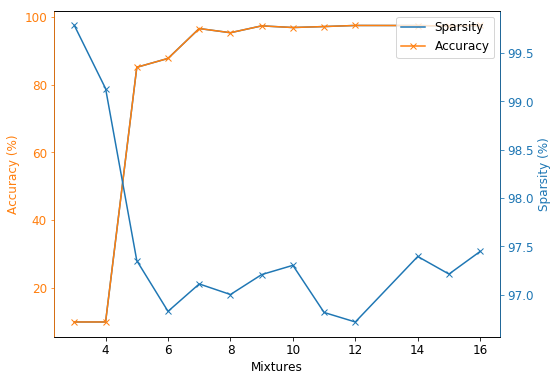

In [30]:
mix_exp = pd.DataFrame(columns = ["mixture", "acc", "sp"])
idx=0
#start from 10, 1000
mixlist = [3, 4, 6, 8, 10, 12, 14, 16]
mixlist = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16]
for mix in mixlist:
    res = loadfile(250, 10, 2500, 1250, 1e-6, 5, mix, "LeNet_300_100", model_save_dir = "./files")
    mix_exp.loc[idx] = ([mix, res["prune_acc"]["test"], res["sparsity"]])
    idx+=1
    
fig, ax1 = plt.subplots(figsize=(8,6))

ax2 = ax1.twinx()
p2 = ax1.plot(mix_exp['mixture'], mix_exp['acc'], label = "Sparsity")
p1 = ax1.plot(mix_exp['mixture'], mix_exp['acc'], label = "Accuracy",  marker = 'x')
p1c = p1[0].get_color()
p2c = p2[0].get_color()
ax1.legend(loc=1)
p2 = ax2.plot(mix_exp['mixture'], mix_exp['sp'], color = p2c,  marker = 'x')

ax1.set_xlabel('Mixtures')
ax1.set_ylabel('Accuracy (%)', color=p1c)
ax2.set_ylabel('Sparsity (%)', color=p2c)
ax2.spines['left'].set_color(p1c)
ax2.spines['right'].set_color(p2c)
ax1.tick_params(axis='y', colors=p1c)
ax2.tick_params(axis='y', colors=p2c)
plt.savefig('figs/swskdmix.eps', format='eps', dpi=1000, bbox_inches='tight')
plt.show()

### 5. Joint Plot

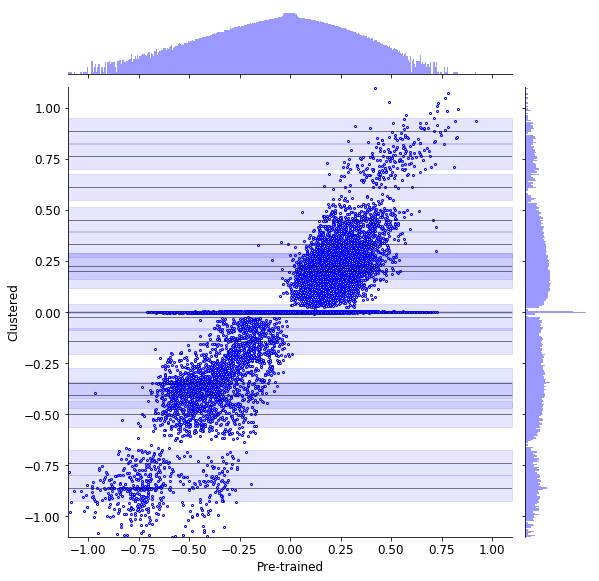

In [12]:
plt.figure()
weights_P = stack_weights(res['init_weights'])
weights_C = stack_weights(res['final_weights'])
#weights_P = res['init_weights'][layer]
#weights_C = res['final_weights'][layer]
mu_C = np.concatenate([np.zeros(1), res['gmp_means'][-1]])
std_C = res['gmp_stddev'][-1]
lim = 1.1
#I = np.random.permutation(len(weights_P))
f = sns.jointplot(weights_P, weights_C, size=8, kind="scatter", color="w", stat_func=None, edgecolor='b', marker='o', joint_kws={"s": 4}, marginal_kws=dict(color="b", bins=400), ratio=6)
f.ax_joint.hlines(mu_C, -lim, lim, lw=0.5)

for k in range(len(mu_C)):
    f.ax_joint.fill_between(np.linspace(-lim, lim, 10), mu_C[k] - std_C[k], mu_C[k] + std_C[k], color='b', alpha=0.1)

f.ax_marg_y.set_xscale("log")
f.ax_marg_x.set_yscale("log")
f.set_axis_labels("Pre-trained", "Clustered")

f.ax_marg_x.set_xlim(-lim, lim)
f.ax_marg_y.set_ylim(-lim, lim)
f.ax_marg_x.set_rasterized(True)
f.ax_marg_y.set_rasterized(True)
f.ax_joint.set_rasterized(True)
#plt.savefig('figs/swskdmap.eps', format='eps', dpi=500, bbox_inches='tight')
plt.show()